In [1]:
import os
import urllib.request

TITANIC_PATH = os.path.join("datasets", "titanic")
DOWNLOAD_URL = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/titanic/"

def fetch_titanic_data(url=DOWNLOAD_URL, path=TITANIC_PATH):
    if not os.path.isdir(path):
        os.makedirs(path)
    for filename in ("train.csv", "test.csv"):
        filepath = os.path.join(path, filename)
        if not os.path.isfile(filepath):
            print("Downloading", filename)
            urllib.request.urlretrieve(url + filename, filepath)

fetch_titanic_data()    

In [2]:
import pandas as pd

def load_csv_titanic(filename,titanic_path = TITANIC_PATH):
    csv_path = os.path.join(titanic_path, filename)
    
    return pd.read_csv(csv_path)

Criei uma função para recarregar os arquivos de teste e treino

In [273]:
titan_train = load_csv_titanic('train.csv')#pd.read_csv('datasets/titanic/train.csv')
titan_test = load_csv_titanic('test.csv') 

In [94]:
titan_train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Cada um dos atributos significa:
PassengerId: Identificador de cada passageiro

Survived: 0 se não sobreviveu e 1 para sobreviveu.

Pclass: A classe de cada passegeiro.

SibSp: Quantos irmão de conjuges de cada passageiro.

Parch: Quantos pais e filhos de cada passageiro.

Fare: Preço pago pela passagem (em Libras).

Cabin: Número da cabine de cada passageiro

Embarked: Onde cada passageiro embarcou.

In [5]:
titan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Aparentemente há dados faltando na idade, cabine e onde cada passageiro embarcou.

In [101]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Vou criar uma função para plotar alguns gráficos

In [62]:
def grafico(feature):
    Survived = titan_train[feature].loc[titan_train['Survived']==0].value_counts()
    Died = titan_train[feature].loc[titan_train['Survived']==1].value_counts()
    df = pd.DataFrame([Survived,Died])
    df.index = ['Survived','Died']
    df.plot(kind='bar',stacked='True')

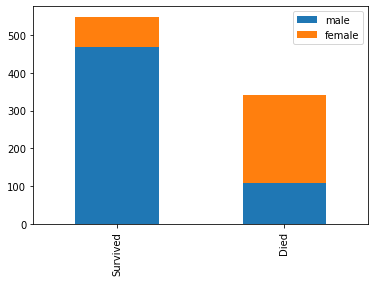

In [64]:
grafico('Sex')

Parece que o sexo é uma característica para se levar em consideração

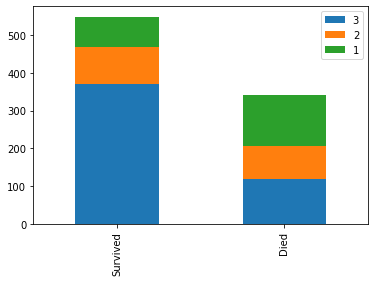

In [65]:
grafico('Pclass')

Parece que bastante gente da 3 Classe sobreviveu outra característica para se considerar importante

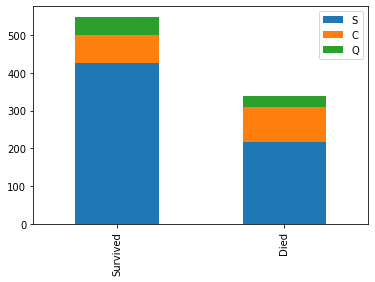

In [68]:
grafico('Embarked')

Bastante gente que embarcou na região S sobreviveu

Na feature Cabin os números não parecem interessantes apenas as letras vamos mudar um pouco isso

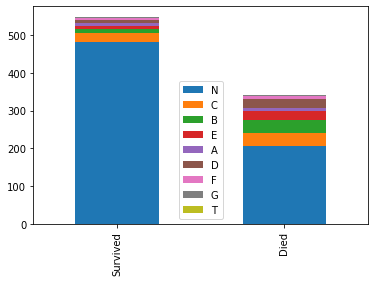

In [87]:
titan_train['Cabin'] = titan_train['Cabin'].str[:1]
titan_train['Cabin'].fillna('N',inplace=True)
grafico('Cabin')

In [89]:
titan_train['Cabin'].value_counts()#Vou mudar para números porque a maioria dos algoritmos de ml lidam melhor com números

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [70]:
cabin_map = {"A": 1, "B": 1, "C": 2, "D": 2, "E": 2, "F": 1, "G": 0, "T": 0, "N": 3}

In [96]:
titan_train['Cabin'] = titan_train['Cabin'].str[:1]
titan_train['Cabin'].fillna('N',inplace=True)#Se fo NA vai preencher com 'N'
cabin_map = {"A": 0, "B": 0, "C": 0, "D": 1, "E": 1, "F": 2, "G": 2, "T": 0, "N": 3}#Aqui apenas mudamos as letras pelos números
titan_train['Cab'] = titan_train['Cabin'].map(cabin_map)

<AxesSubplot:>

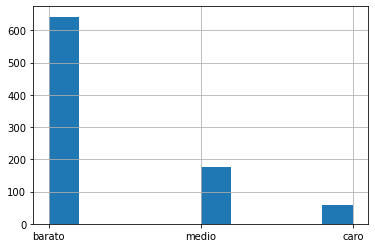

In [110]:
titan_train['Fare_Class'] = pd.cut(titan_train['Fare'],bins =[0.,30.,90.,np.inf],labels =['barato','medio','caro',])
titan_train['Fare_Class'].hist()

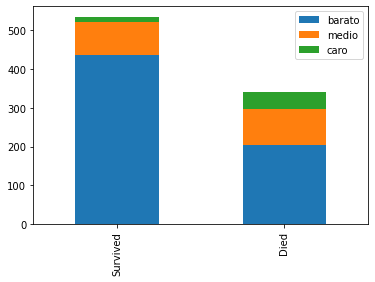

In [111]:
grafico('Fare_Class')

Os nomes das pessoas parece ter títulos como MR,Mrs,Dr talvez seja de relevancia também

In [123]:
titan_train['Name'].map(lambda x : x.split()[1])

PassengerId
1        Mr.
2       Mrs.
3      Miss.
4       Mrs.
5        Mr.
       ...  
887     Rev.
888    Miss.
889    Miss.
890      Mr.
891      Mr.
Name: Name, Length: 891, dtype: object

In [274]:
titan_train = titan_train.set_index('PassengerId')#apenas trocar o indice para o ID de cada passageiro
titan_test = titan_test.set_index('PassengerId')

In [275]:
def transform(df):
    median = df['Age'].median()
    df['Age'].fillna(median,inplace=True)
    
    df['Fare'].fillna(df['Fare'].median(),inplace=True)
    
    df['Embarked_C'] = (df['Embarked' ] == 'C').astype(int)
    df['Embarked_Q'] = (df['Embarked'] == 'Q').astype(int)
    df['Embarked_S'] = (df['Embarked'] == 'S').astype(int)
    
    df['sex_binary'] = df['Sex'].map(lambda x : 0 if x == 'female' else 1 )
    
    df['Title_Mr'] = df['Name'].map(lambda x : x.split()[1] == 'Mr.').astype(int)
    df['Title_Miss'] = df['Name'].map(lambda x : x.split()[1] == 'Miss').astype(int)
    df['Title_Mrs'] = df['Name'].map(lambda x : x.split()[1] == 'Mrs').astype(int)
    df['Title_Master'] = df['Name'].map(lambda x : x.split()[1] == 'Master.').astype(int)
    
    
    df['Cabin'] = df['Cabin'].str[:1]
    df['Cabin'].fillna('N',inplace=True)
    
    df['Cab'] = df['Cabin'].map(cabin_map)
    
    Colunas = ['Age','sex_binary','Pclass','SibSp','Parch','Fare','Embarked_C','Embarked_S','Embarked_Q','Title_Mr','Title_Miss','Title_Mrs','Title_Master']
    return df[Colunas]  

In [276]:
X_train = transform(titan_train)#Criando um dataframe para treino
labels = titan_train['Survived']#rótulo da classificação que é sobrevivente ou morto

In [287]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)#vamos primeiro usar o randomforest

Validação por meio de uma função e uma outra dando uma ideia no que está acontecendo para ele conseguir o score 

In [288]:
from sklearn.model_selection import cross_val_score
cross_val_score(forest_clf,X_train,labels,cv=10,scoring='accuracy').mean()

0.800274656679151

In [148]:
from sklearn.model_selection import StratifiedKFold
resultados = []
for i in range(10):

    skfolds = StratifiedKFold(n_splits = 2,random_state = i,shuffle=True)

    
    for train_index,test_index in skfolds.split(X_train,labels):
        
        X_treino = X_train.iloc[train_index]
        X_labels = labels.iloc[train_index]
        X_teste = X_train.iloc[test_index]
        X_test_labels = labels.iloc[test_index]

        forest_clf.fit(X_treino,X_labels)
        y_pred = forest_clf.predict(X_teste)
        
        acc = np.mean(X_test_labels == y_pred)
        print(acc)
        resultados.append(acc)

print('A média é : ',np.mean(resultados))   


0.804932735426009
0.7865168539325843
0.8004484304932735
0.802247191011236
0.7914798206278026
0.8269662921348314
0.8116591928251121
0.7932584269662921
0.827354260089686
0.7955056179775281
0.7937219730941704
0.7842696629213484
0.8228699551569507
0.8202247191011236
0.8094170403587444
0.8089887640449438
0.804932735426009
0.8157303370786517
0.7600896860986547
0.8292134831460675
A média é :  0.8044913588955509


Verificando outras métricas como a precisão e revocação

In [291]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(forest_clf,X_train,labels,cv=2)

In [292]:
from sklearn.metrics import confusion_matrix

In [293]:
conf = confusion_matrix(labels,y_train_pred)
conf

array([[466,  83],
       [101, 241]], dtype=int64)

In [294]:
Falso_Positivo = conf[0,1]
Verdadeiro_Positivo = conf[1,1]
Falso_negativo = conf[1,0]
Verdadeiro_Negativo = conf[0,0]

In [295]:
Precisão = Verdadeiro_Positivo/( Verdadeiro_Positivo+Falso_Positivo)
print(Precisão) # a cada 330 ele acerta 234
Revocação =  Verdadeiro_Positivo/( Verdadeiro_Positivo+Falso_negativo)
print(Revocação)

0.7438271604938271
0.7046783625730995


Vamos dar uma olhada agora na regressão logistica

In [296]:
from sklearn.linear_model import LogisticRegression
lgc = LogisticRegression()
#lgc.fit(X_train,labels)

In [304]:
from sklearn.model_selection import cross_val_score
cross_val_score(lgc,X_train,labels,cv=5).mean()#parece um pouco melhor iremos utilizá-lo

C:\Users\gyube\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\gyube\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.8226539451384095

Iremos agora modificar os dados do teste como fizemos no de treino

In [307]:
titan_test.head(20)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S,sex_binary,Title_Mr,Title_Miss,Title_Mrs,Title_Master,Cab
PassengerId,,,,,,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,N,Q,0,1,0,1,1,0,0,0,3
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,N,S,0,0,1,0,0,0,0,0,3
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,N,Q,0,1,0,1,1,0,0,0,3
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,N,S,0,0,1,1,1,0,0,0,3
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,N,S,0,0,1,0,0,0,0,0,3
897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,N,S,0,0,1,1,1,0,0,0,3
898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,N,Q,0,1,0,0,0,0,0,0,3
899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,N,S,0,0,1,1,1,0,0,0,3
900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,N,C,1,0,0,0,0,0,0,0,3


In [306]:
from sklearn.linear_model import LogisticRegression
lgc = LogisticRegression()
lgc.fit(X_train,labels)

C:\Users\gyube\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [279]:
X_test = transform(titan_test)

In [280]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           418 non-null    float64
 1   sex_binary    418 non-null    int64  
 2   Pclass        418 non-null    int64  
 3   SibSp         418 non-null    int64  
 4   Parch         418 non-null    int64  
 5   Fare          418 non-null    float64
 6   Embarked_C    418 non-null    int32  
 7   Embarked_S    418 non-null    int32  
 8   Embarked_Q    418 non-null    int32  
 9   Title_Mr      418 non-null    int32  
 10  Title_Miss    418 non-null    int32  
 11  Title_Mrs     418 non-null    int32  
 12  Title_Master  418 non-null    int32  
dtypes: float64(2), int32(7), int64(4)
memory usage: 34.3 KB


In [282]:
y_pred = lgc.predict(X_test)

In [283]:
arq = pd.Series(y_pred,index =X_test.index,name='Survived')

In [284]:
arq.to_csv('primeiro_model.csv',header=True)

In [285]:
df = pd.read_csv('primeiro_model.csv')

In [308]:
df #precisão de 0,779 no kaggle

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
